In [2]:
import pandas as pd                 # Importing Pandas library for data manipulation
import numpy as np                  # Importing NumPy library for numerical computations
import matplotlib.pyplot as plt    # Importing Matplotlib library for plotting
import seaborn as sns               # Importing Seaborn library for enhanced visualization
from sklearn.cluster import KMeans # Importing KMeans for clustering
from sklearn.metrics import silhouette_score # Importing Silhouette score for evaluating clustering performance
from sklearn.preprocessing import normalize # Importing normalize function for data normalization
import scipy.cluster.hierarchy as shc       # Importing scipy library for hierarchical clustering
from sklearn.cluster import AgglomerativeClustering # Importing AgglomerativeClustering for hierarchical clustering
sns.set()                          # Setting the default styles to Seaborn

In [3]:
path = r'C:\Users\User\Desktop\Rashad\DATA\cluster.csv'  # Path to the CSV file
data = pd.read_csv(path)                                # Reading the CSV file into a pandas DataFrame

In [4]:
data

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [5]:
data = data.drop('CUST_ID', axis=1)  # Dropping the 'CUST_ID' column from the DataFrame

In [6]:
data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322               NaN          0.000000       6  
8947    81

In [7]:
data.isnull().sum()  # Checking for missing values in each column of the DataFrame

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
for column in data.columns:                              # Iterating over each column in the DataFrame
    data[column].fillna(data[column].mean(), inplace=True)  # Filling missing values with the mean of the column

In [9]:
data.isnull().sum()  # Checking for missing values in each column of the DataFrame

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
data_with_clusters = data.copy()  # Creating a copy of the DataFrame 'data' called 'data_with_clusters'
x = data_with_clusters            # Assigning 'data_with_clusters' to 'x'

In [11]:
wcss = []             # List to store within-cluster sum of squares (WCSS) for each cluster
silhouette_scores = [] # List to store silhouette scores for each cluster

for i in range(2, 7):           # Iterating over a range of cluster numbers from 2 to 6
    kmeans = KMeans(n_clusters=i)  # Creating a KMeans clustering object with current number of clusters
    kmeans.fit(x)                  # Fitting the KMeans model to the data
    
    wcss_iter = kmeans.inertia_    # Calculating WCSS for the current clustering
    wcss.append(wcss_iter)         # Appending WCSS to the list
    
    y = kmeans.fit_predict(x)      # Predicting cluster labels for the data
    silhouette_avg = silhouette_score(x, y)  # Calculating silhouette score for the current clustering
    silhouette_scores.append(silhouette_avg) # Appending silhouette score to the list

    # Printing WCSS and silhouette score for the current cluster
    wcss_str = '{:.40f}'.format(wcss_iter)  # Formatting WCSS as a string
    print(f"Cluster {i}: WCSS = {wcss_str}, Silhouette Score = {silhouette_avg}")  # Printing results

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 2: WCSS = 279296252926.8751831054687500000000000000000000000000, Silhouette Score = 0.511639269641848


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 3: WCSS = 232802169103.4285278320312500000000000000000000000000, Silhouette Score = 0.4676551448676235


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 4: WCSS = 206554667302.8625793457031250000000000000000000000000, Silhouette Score = 0.4669548964212031


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 5: WCSS = 186570063604.6495056152343750000000000000000000000000, Silhouette Score = 0.3954888675952776


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 6: WCSS = 167020167005.0796813964843750000000000000000000000000, Silhouette Score = 0.40891537177784487


Text(0, 0.5, 'Within-cluster Sum of Squares')

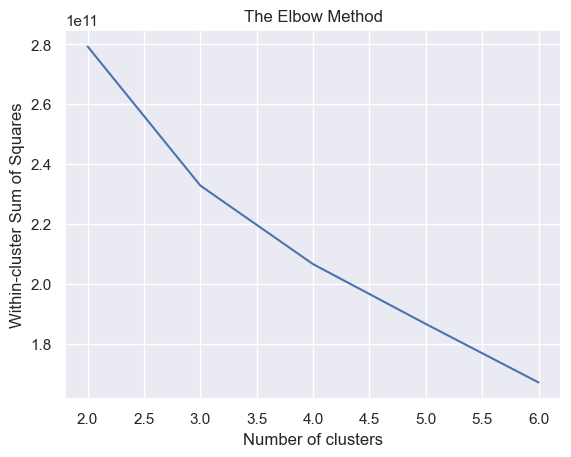

In [12]:
number_clusters = range(2, 7)    # Range of cluster numbers
plt.plot(number_clusters, wcss)  # Plotting number of clusters against WCSS
plt.title('The Elbow Method')     # Setting title of the plot
plt.xlabel('Number of clusters')  # Setting label for x-axis
plt.ylabel('Within-cluster Sum of Squares')  # Setting label for y-axis

In [13]:
kmeans = KMeans(2)  # Initializing a KMeans clustering model with 2 clusters
kmeans.fit(x)       # Fitting the model to the data

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [14]:
y = kmeans.fit_predict(x)  # Predicting cluster labels for each sample in the data

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
data_with_clusters['Cluster'] = y  # Adding a new column 'Cluster' containing predicted cluster labels
data_with_clusters                  # Displaying the modified DataFrame

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0      201.802084        139.509787          0.000000      12        0  
1     4103.032597       1072.340217          0.222222      12        1  
2      622.066742        627.284787          0.000000      12        0  
3        0.000000        864.206542          0.000000      12        0  
4      678.334763        244.791237          0.000000      12        0  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        0  
89

# Agglomerative Hierarchical Clustering

In [16]:
data_scaled = normalize(data)               # Normalizing the data
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)  # Converting normalized array back to DataFrame
data_scaled.head()                          # Displaying the first few rows of the scaled DataFrame

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.039353           0.000787   0.091790          0.000000   
1  0.293876           0.000083   0.000000          0.000000   
2  0.310798           0.000125   0.096307          0.096307   
3  0.207829           0.000079   0.186921          0.186921   
4  0.504284           0.000617   0.009867          0.009867   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 0.09179      0.000000             0.000160   
1                 0.00000      0.591240             0.000000   
2                 0.00000      0.000000             0.000125   
3                 0.00000      0.025661             0.000010   
4                 0.00000      0.000000             0.000051   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                           0.00008   
1                    0.000000                           0.00000   
2                    0.000125                           0.00000   
3                    0.000010                           0.00000   
4                    0.000051                           0.00000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000          0.000000       0.001924      0.962156   
1                0.000023          0.000367       0.000000      0.642358   
2                0.000000          0.000000       0.001495      0.934206   
3                0.000010          0.000125       0.000125      0.935229   
4                0.000000          0.000000       0.000617      0.740040   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0  0.194165          0.134230           0.00000  0.011546  
1  0.376516          0.098404           0.00002  0.001101  
2  0.077485          0.078135           0.00000  0.001495  
3  0.000000          0.107764           0.00000  0.001496  
4  0.418329          0.150963           0.00000  0.007400

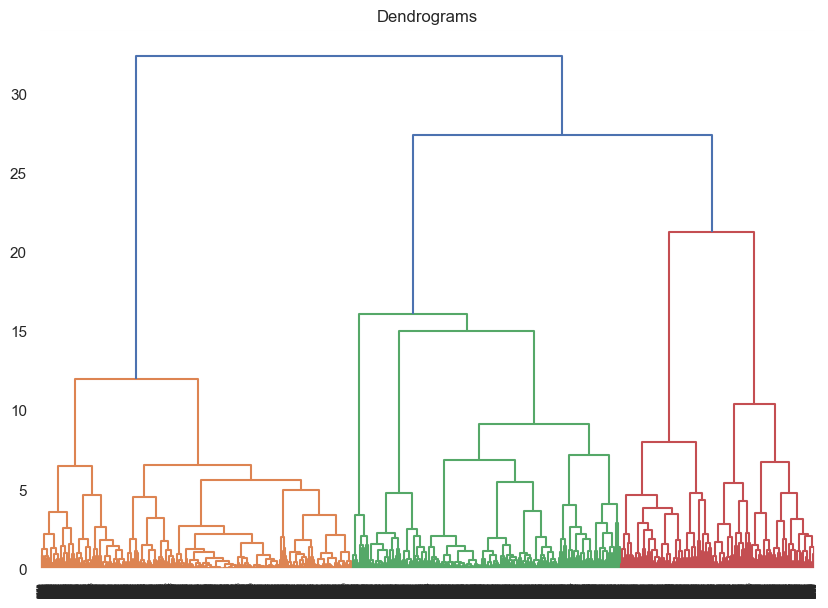

In [17]:
plt.figure(figsize=(10, 7))  # Setting the size of the plot
plt.title("Dendrograms")     # Setting the title of the plot
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))  # Generating the dendrogram using Ward's method

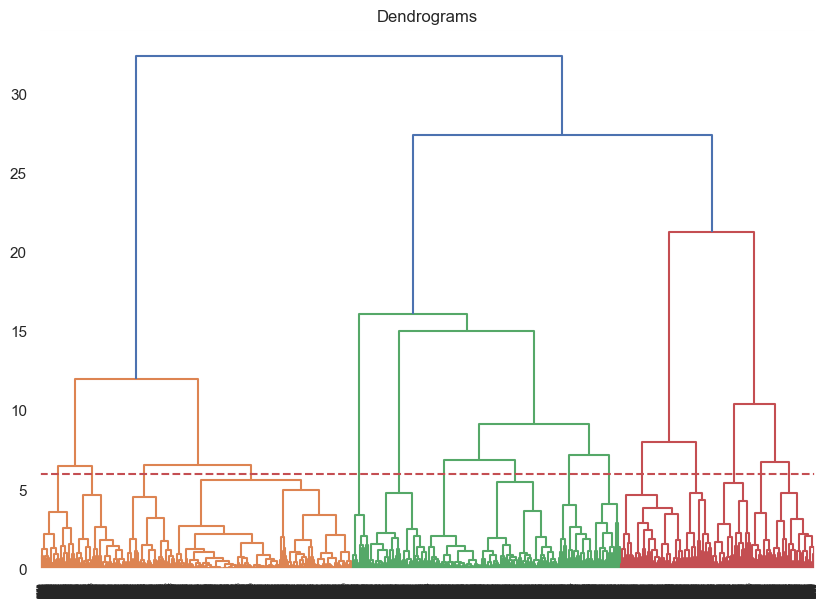

In [18]:
plt.figure(figsize=(10, 7))  # Setting the size of the plot
plt.title("Dendrograms")     # Setting the title of the plot
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))  # Generating the dendrogram using Ward's method
plt.axhline(y=6, color='r', linestyle='--')  # Adding a horizontal line at y=6, marked in red and dashed

In [19]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  # Creating an AgglomerativeClustering object
y = cluster.fit_predict(data_scaled)  # Predicting cluster labels for each sample in the scaled data
y  # Displaying the cluster labels

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [20]:
data['dependent_value'] = y  # Adding a new column 'dependent_value' containing predicted cluster labels
data                          # Displaying the modified DataFrame

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  dependent_value  
0      201.802084        139.509787          0.000000      12                1  
1     4103.032597       1072.340217          0.222222      12                0  
2      622.066742        627.284787          0.000000      12                1  
3        0.000000        864.206542          0.000000      12                1  
4      678.334763        244.791237          0.000000      12                2  
...           ...               ...               ...     ...              ...  
8945   325.594462  

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


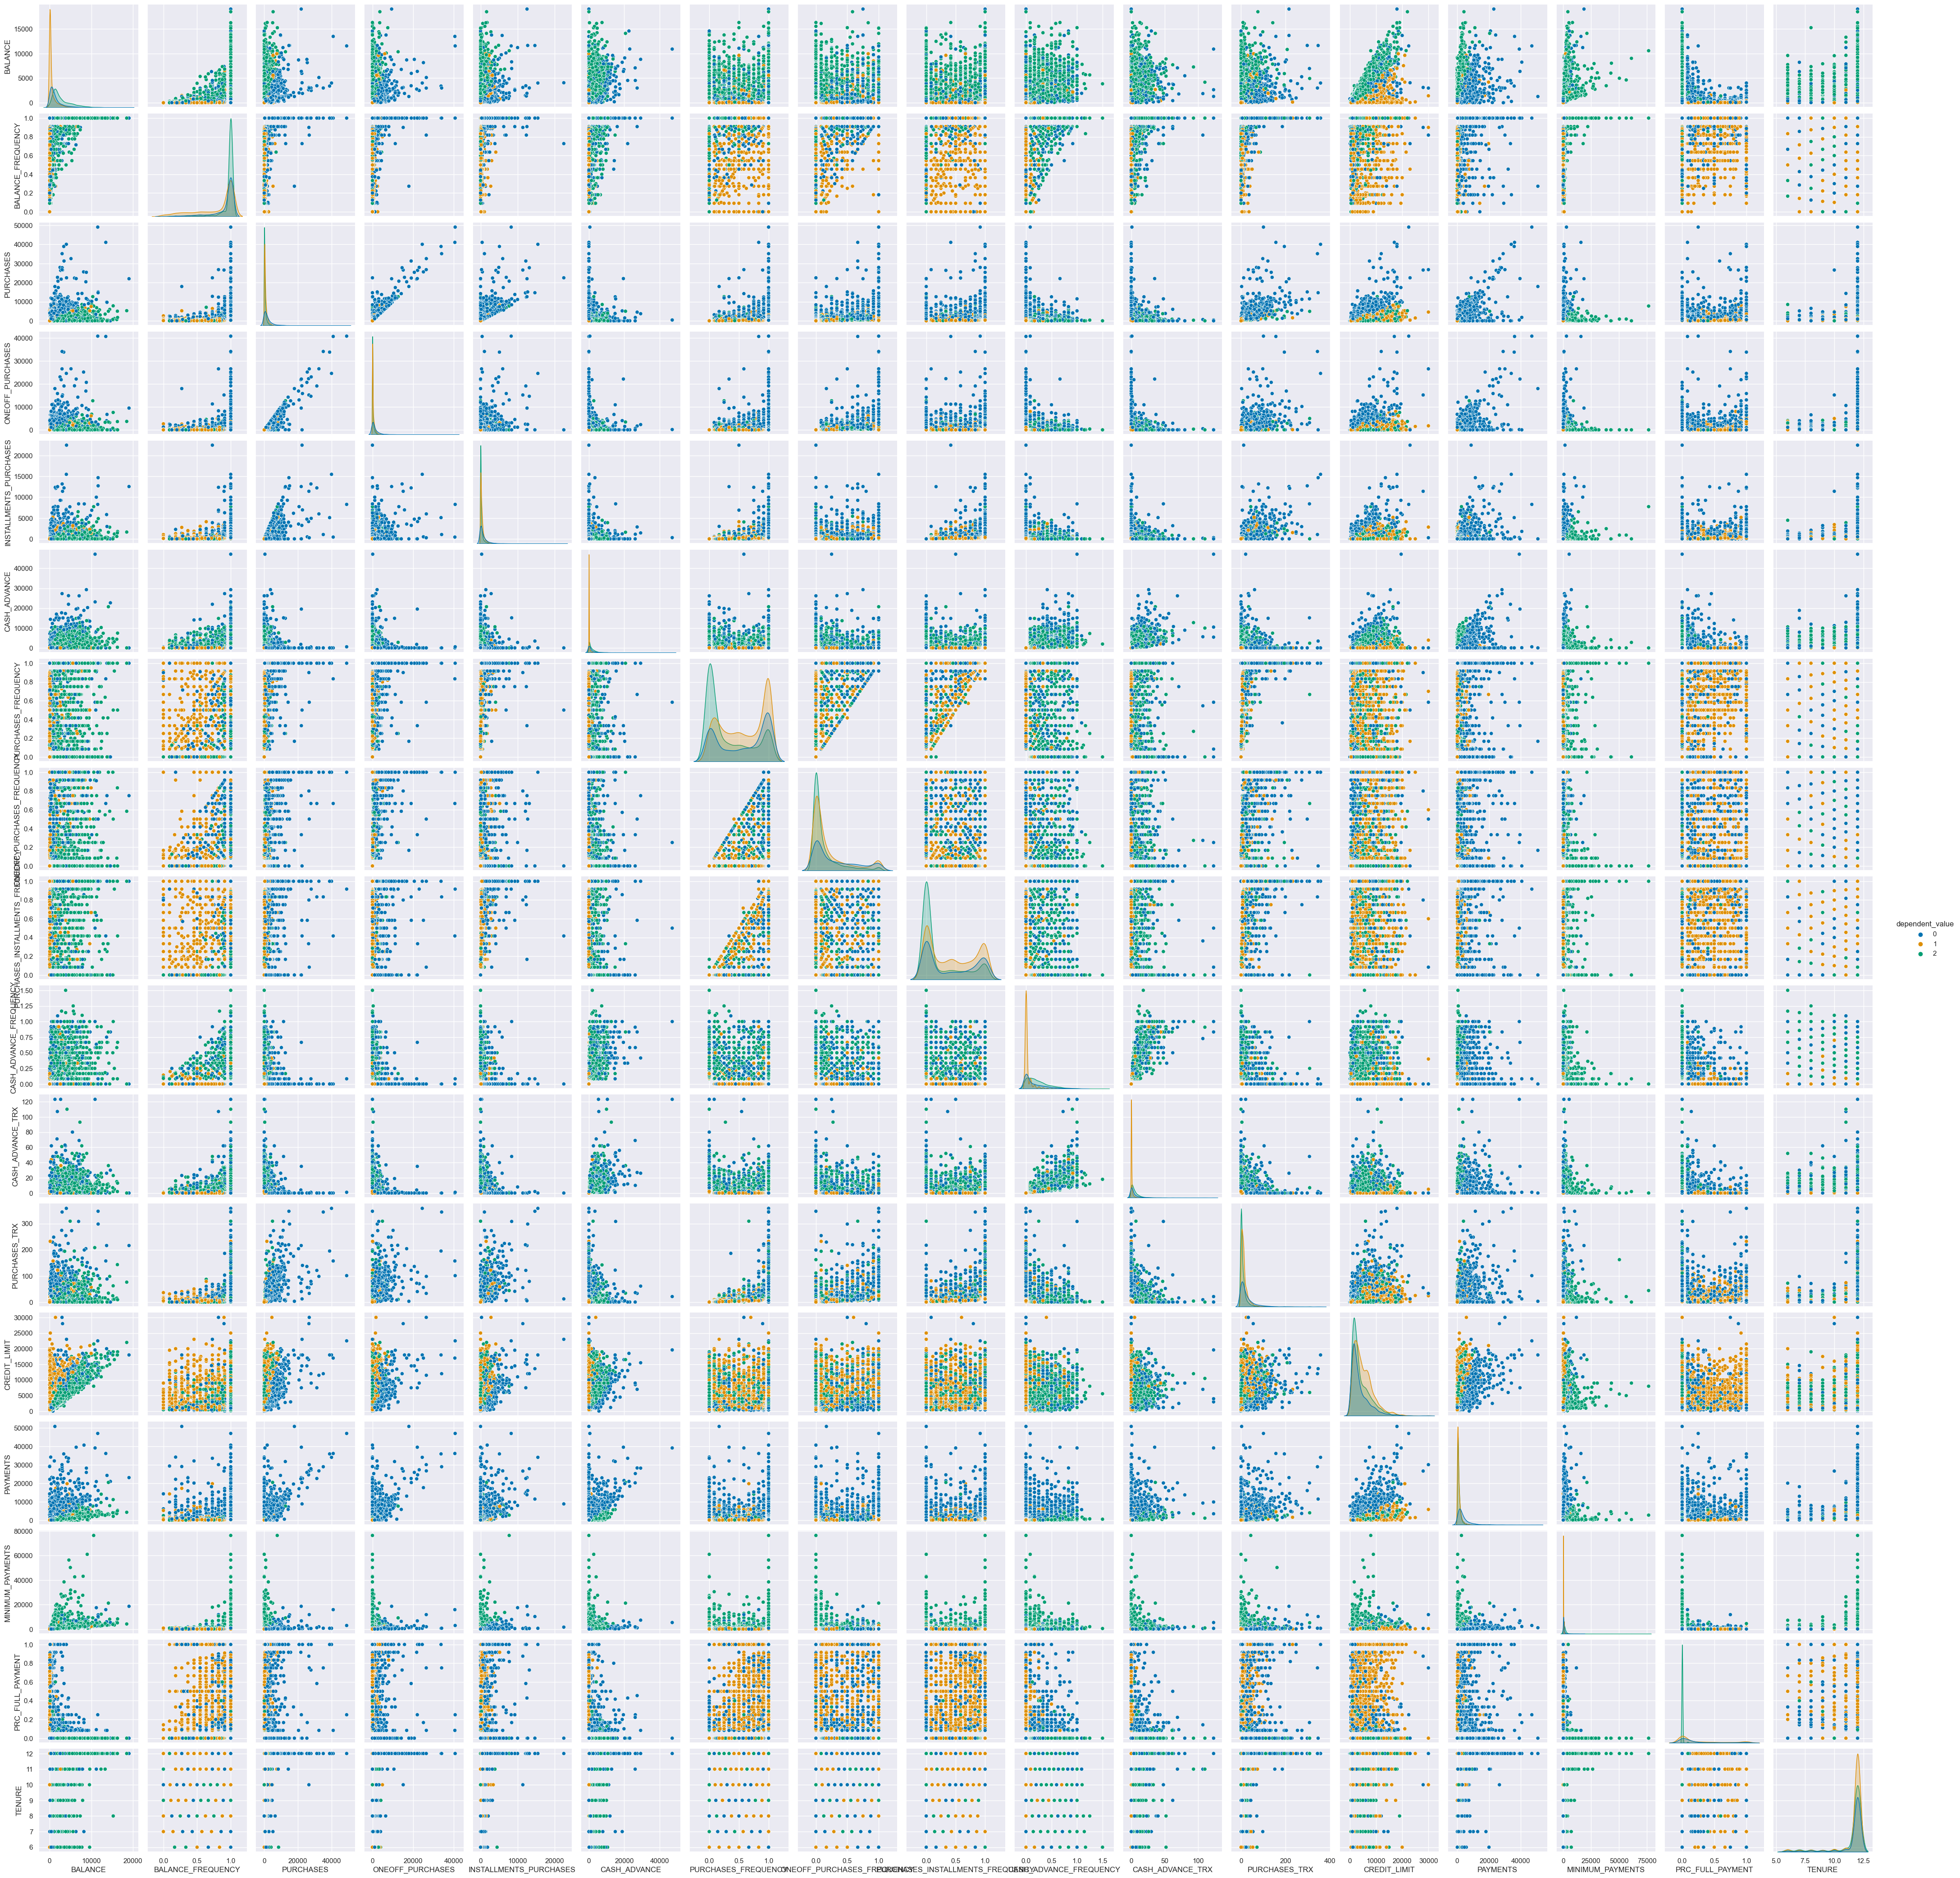

In [21]:
sns.pairplot(data, hue='dependent_value', palette='colorblind')  # Creating a pairplot with data points colored by cluster labels